### Initialize Processing

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

### Explore Data

This dataset is sparse, meaning that there are mostly 0's in the feature matrix. Some pixels carry a lot of information about the digit written, while other pixel features such as the edges are usually 0's and not very informative.

In [29]:
train.describe()

Rows:42000
Cols:785




label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8 pixel9 pixel10 pixel11 pixel12 pixel13 pixel14 pixel15 pixel16 pixel17 pixel18 pixel19 pixel20 pixel21 pixel22 pixel23 pixel24 pixel25 pixel26 pixel27 pixel28 pixel29 pixel30 pixel31 pixel32 pixel33 pixel34 pixel35 pixel36 pixel37 pixel38 pixel39 pixel40 pixel41 pixel42 pixel43 pixel44 pixel45 pixel46 pixel47 pixel48 pixel49 pixel50 pixel51 pixel52 pixel53 pixel54 pixel55 pixel56 pixel57 pixel58 pixel59 pixel60 pixel61 pixel62 pixel63 pixel64 pixel65 pixel66 pixel67 pixel68 pixel69 pixel70 pixel71 pixel72 pixel73 pixel74 pixel75 pixel76 pixel77 pixel78 pixel79 pixel80 pixel81 pixel82 pixel83 pixel84 pixel85 pixel86 pixel87 pixel88 pixel89 pixel90 pixel91 pixel92 pixel93 pixel94 pixel95 pixel96 pixel97 pixel98 pixel99 pixel100 pixel101 pixel102 pixel103 pixel104 pixel105 pixel106 pixel107 pixel108 pixel109 pixel110 pixel111 pixel112 pixel113 pixel114 pixel115 pixel116 pixel117 pixel118 pixel119 pixel120 pixel121 pixel122 pixel123 pixel124 pixel125 pixel126 pixel127 pixel128 pixel129 pixel130 pixel131 pixel132 pixel133 pixel134 pixel135 pixel136 pixel137 pixel138 pixel139 pixel140 pixel141 pixel142 pixel143 pixel144 pixel145 pixel146 pixel147 pixel148 pixel149 pixel150 pixel151 pixel152 pixel153 pixel154 pixel155 pixel156 pixel157 pixel158 pixel159 pixel160 pixel161 pixel162 pixel163 pixel164 pixel165 pixel166 pixel167 pixel168 pixel169 pixel170 pixel171 pixel172 pixel173 pixel174 pixel175 pixel176 pixel177 pixel178 pixel179 pixel180 pixel181 pixel182 pixel183 pixel184 pixel185 pixel186 pixel187 pixel188 pixel189 pixel190 pixel191 pixel192 pixel193 pixel194 pixel195 pixel196 pixel197 pixel198 pixel199 pixel200 pixel201 pixel202 pixel203 pixel204 pixel205 pixel206 pixel207 pixel208 pixel209 pixel210 pixel211 pixel212 pixel213 pixel214 pixel215 pixel216 pixel217 pixel218 pixel219 pixel220 pixel221 pixel222 pixel223 pixel224 pixel225 pixel226 pixel227 pixel228 pixel229 pixel230 pixel231 pixel232 pixel233 pixel234 pixel235 pixel236 pixel237 pixel238 pixel239 pixel240 pixel241 pixel242 pixel243 pixel244 pixel245 pixel246 pixel247 pixel248 pixel249 pixel250 pixel251 pixel252 pixel253 pixel254 pixel255 pixel256 pixel257 pixel258 pixel259 pixel260 pixel261 pixel262 pixel263 pixel264 pixel265 pixel266 pixel267 pixel268 pixel269 pixel270 pixel271 pixel272 pixel273 pixel274 pixel275 pixel276 pixel277 pixel278 pixel279 pixel280 pixel281 pixel282 pixel283 pixel284 pixel285 pixel286 pixel287 pixel288 pixel289 pixel290 pixel291 pixel292 pixel293 pixel294 pixel295 pixel296 pixel297 pixel298 pixel299 pixel300 pixel301 pixel302 pixel303 pixel304 pixel305 pixel306 pixel307 pixel308 pixel309 pixel310 pixel311 pixel312 pixel313 pixel314 pixel315 pixel316 pixel317 pixel318 pixel319 pixel320 pixel321 pixel322 pixel323 pixel324 pixel325 pixel326 pixel327 pixel328 pixel329 pixel330 pixel331 pixel332 pixel333 pixel334 pixel335 pixel336 pixel337 pixel338 pixel339 pixel340 pixel341 pixel342 pixel343 pixel344 pixel345 pixel346 pixel347 pixel348 pixel349 pixel350 pixel351 pixel352 pixel353 pixel354 pixel355 pixel356 pixel357 pixel358 pixel359 pixel360 pixel361 pixel362 pixel363 pixel364 pixel365 pixel366 pixel367 pixel368 pixel369 pixel370 pixel371 pixel372 pixel373 pixel374 pixel375 pixel376 pixel377 pixel378 pixel379 pixel380 pixel381 pixel382 pixel383 pixel384 pixel385 pixel386 pixel387 pixel388 pixel389 pixel390 pixel391 pixel392 pixel393 pixel394 pixel395 pixel396 pixel397 pixel398 pixel399 pixel400 pixel401 pixel402 pixel403 pixel404 pixel405 pixel406 pixel407 pixel408 pixel409 pixel410 pixel411 pixel412 pixel413 pixel414 pixel415 pixel416 pixel417 pixel418 pixel419 pixel420 pixel421 pixel422 pixel423 pixel424 pixel425 pixel426 pixel427 pixel428 pixel429 pixel430 pixel431 pixel432 pixel433 pixel434 pixel435 pixel436 pixel437 pixel438 pixel439 pixel440 pixel441 pixel442 pixel443 pixel444 pixel445 pixel446 pixel447 pixel448 pixel449 pixel450 pixel451 pixel452 pixel453 pixel454 pixel455 

In [30]:
pandas_train = train.as_data_frame(use_pandas=True) #Convert to Pandas frame

The histogram shows the count of digits in the training data for each number. This graph is used to visualize if there is an unequal sample size among the digits. The sample size for each digit appears to be comparable. There is no issue of unequal sampling.

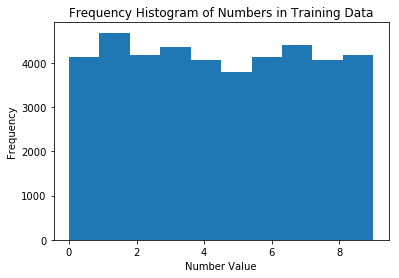

In [31]:
plt.hist(pandas_train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

This graphic plots the first few digits in the training set to show how this pixel data is representing digits, and to show how the handwriting varies. Not all digits are written the same. For example, there is a lot of variation in how people write 4s and 9s

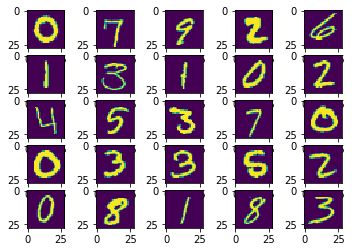

In [32]:
import math
# plot the first 25 digits in the training set. 
f, ax = plt.subplots(5, 5)
# plot some 4s as an example
for i in range(1,26):
    # Create a 1024x1024x3 array of 8 bit unsigned integers
    data = pandas_train.iloc[i,1:785].values #this is the first number
    nrows, ncols = 28, 28
    grid = data.reshape((nrows, ncols))
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(grid)

In [33]:
train, valid = train.split_frame([0.8])

In [34]:
# assign target and inputs
y = 'label'
X = [name for name in train.columns if name != y]
print(y)
print(X)

label
['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'p

In [35]:
# set target to factor - for multinomial classification
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()

### Compress the Features into Small but Informative Sets via PCA

## TBD

In [36]:
# NN with random hyperparameter search
# train many different NN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden': [[500, 500], [250, 250, 250, 250], [1000, 500], [500, 1000], [1000, 500, 250], [1000, 1000]],
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':900}

# initialize grid search
gsearch = H2OGridSearch(H2ODeepLearningEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid, 
              activation='RectifierWithDropout', 
              epochs=8000, 
              stopping_rounds=20,
              sparse=True, # handles data w/ many zeros more efficiently                     
              ignore_const_cols=True,              
              adaptive_rate=True)

# view detailed results at http://host:ip/flow/index.html

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [37]:
# show grid search results
gsearch.show()

# select best model
mnist_model = gsearch.get_grid()[0]

# print model information
mnist_model

# hit-ratio = ((TP + TN)/(TP + TN + FP + FN)), for two-classes

               hidden input_dropout_ratio    l1     l2  \
0    [1000, 500, 250]                0.18  0.02  0.007   

                                                               model_ids  \
0  Grid_DeepLearning_py_16_sid_a419_model_python_1498594573971_2_model_0   

             logloss  
0  1.357242726866768  
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  Grid_DeepLearning_py_16_sid_a419_model_python_1498594573971_2_model_0


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.5065638134677581
RMSE: 0.711732965000047
LogLoss: 1.3529713147250044
Mean Per-Class Error: 0.4908324514066057
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,5,6,7,8,9,Error,Rate
0.0,0.0,11.0,0.0,13.0,0.0,983.0,0.0,2.0,0.0,1.0,"1,009 / 1,009"
0.0,1071.0,27.0,21.0,1.0,0.0,1.0,5.0,2.0,2.0,0.0522124,"59 / 1,130"
0.0,20.0,858.0,28.0,11.0,0.0,66.0,19.0,2.0,2.0,0.1471173,"148 / 1,006"
0.0,400.0,332.0,158.0,8.0,0.0,20.0,83.0,13.0,7.0,0.8452498,"863 / 1,021"
0.0,2.0,2.0,0.0,671.0,0.0,26.0,31.0,1.0,286.0,0.3415113,"348 / 1,019"
0.0,137.0,95.0,43.0,66.0,0.0,373.0,18.0,113.0,74.0,1.0,919 / 919
0.0,2.0,44.0,2.0,10.0,0.0,876.0,0.0,0.0,0.0,0.0620985,58 / 934
0.0,12.0,8.0,7.0,12.0,0.0,1.0,694.0,1.0,264.0,0.3053053,305 / 999
0.0,182.0,328.0,157.0,48.0,0.0,120.0,53.0,52.0,18.0,0.9457203,906 / 958
0.0,8.0,2.0,3.0,67.0,0.0,3.0,118.0,1.0,764.0,0.2091097,202 / 966


Top-10 Hit Ratios: 


k,hit_ratio
1,0.516414
2,0.767694
3,0.848208
4,0.9236020
5,0.9687782
6,0.9908644
7,0.9966871
8,0.9987953
9,0.9995984
10,1.0



ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.5038394880300443
RMSE: 0.7098165171578105
LogLoss: 1.357242726866768
Mean Per-Class Error: 0.4877550542606347
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,5,6,7,8,9,Error,Rate
0.0,0.0,9.0,0.0,8.0,0.0,817.0,0.0,0.0,2.0,1.0,836 / 836
0.0,856.0,20.0,20.0,1.0,0.0,4.0,8.0,1.0,0.0,0.0593407,54 / 910
0.0,24.0,697.0,25.0,15.0,0.0,52.0,11.0,3.0,0.0,0.1571947,130 / 827
0.0,350.0,283.0,118.0,3.0,0.0,18.0,70.0,10.0,6.0,0.8624709,740 / 858
0.0,2.0,5.0,2.0,562.0,0.0,21.0,23.0,1.0,214.0,0.3228916,268 / 830
0.0,124.0,85.0,34.0,50.0,0.0,314.0,7.0,97.0,64.0,1.0,775 / 775
0.0,0.0,30.0,1.0,8.0,0.0,776.0,0.0,3.0,0.0,0.0513447,42 / 818
0.0,11.0,4.0,5.0,14.0,0.0,2.0,624.0,0.0,193.0,0.2684642,229 / 853
0.0,138.0,264.0,128.0,26.0,0.0,100.0,65.0,39.0,27.0,0.9504447,748 / 787
0.0,10.0,3.0,4.0,56.0,0.0,9.0,92.0,1.0,677.0,0.2053991,175 / 852


Top-10 Hit Ratios: 


k,hit_ratio
1,0.5210879
2,0.7668344
3,0.8444763
4,0.9222381
5,0.9693266
6,0.9886172
7,0.9936496
8,0.9977234
9,0.9991612
10,0.9999999


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2017-06-27 21:24:10,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2017-06-27 21:24:13,36.305 sec,96 obs/sec,0.0048434,1,163.0,0.7962669,2.2106540,0.7301476,0.7973216,2.2176435,0.7330458
,2017-06-27 21:29:47,5 min 57.078 sec,183 obs/sec,1.6492839,291,55505.0,0.7500067,1.4813941,0.5836763,0.7495875,1.4858056,0.5823149
,2017-06-27 21:33:11,9 min 21.297 sec,195 obs/sec,2.8192488,498,94879.0,0.7302752,1.4078296,0.5036643,0.7291508,1.4126705,0.4980829
,2017-06-27 21:36:33,12 min 42.697 sec,203 obs/sec,4.0440067,715,136097.0,0.7117330,1.3529713,0.4835860,0.7098165,1.3572427,0.4789121


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
pixel32,1.0,1.0,0.0052966
pixel167,0.9902701,0.9902701,0.0052450
pixel449,0.9712266,0.9712266,0.0051442
pixel616,0.9648693,0.9648693,0.0051105
pixel559,0.9647371,0.9647371,0.0051098
---,---,---,---
pixel628,0.0098313,0.0098313,0.0000521
pixel432,0.0097971,0.0097971,0.0000519
pixel161,0.0093988,0.0093988,0.0000498
pixel160,0.0090838,0.0090838,0.0000481



See the whole table with table.as_data_frame()


In [38]:
# create time stamp
import re
import time
time_stamp = re.sub('[: ]', '_', time.asctime())

# score unlabeled test data
sub = mnist_model.predict(test)

# save file for submission
sub = sub['predict']

import numpy as np # create ID column
sub = h2o.H2OFrame(np.arange(1, 28001)).cbind(sub) 

sub.columns = ['ImageId', 'Label']

print(sub.head())

sub_fname = '../submission_' + str(time_stamp) + '.csv'
h2o.download_csv(sub, sub_fname)

deeplearning prediction progress: |███████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


ImageId,Label
1,2
2,6
3,9
4,4
5,2
6,7
7,6
8,3
9,6
10,3


In [39]:
# shutdown h2o - this will erase all your unsaved frames and models in H2O
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://localhost:54321 (Y/N)? Y
H2O session _sid_a419 closed.
